## データの取り込みと確認

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [4]:
# データの取り込み
df_master = pd.read_csv("diabetes_analysis_data.csv")
df = df_master.copy()
df.head()

,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,76395,Female,42.0,0,0,never,28.71,6.0,90,0
1,30026,Male,56.0,0,0,current,29.64,5.8,159,0
2,759,Female,27.0,0,0,NaN,27.32,4.8,85,0
3,19671,Female,80.0,0,1,ever,25.33,6.8,280,1
4,17521,Male,45.0,0,0,former,32.54,6.0,130,1


infoメソッドやdescribeメソッドを使って、おかしなデータがないか確認する。

In [5]:
#データの欠損と型の確認(info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21440 entries, 0 to 21439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                21440 non-null  int64  
 1   gender               21434 non-null  object 
 2   age                  21440 non-null  float64
 3   hypertension         21440 non-null  int64  
 4   heart_disease        21440 non-null  int64  
 5   smoking_history      14751 non-null  object 
 6   bmi                  21440 non-null  float64
 7   HbA1c_level          21440 non-null  float64
 8   blood_glucose_level  21440 non-null  int64  
 9   diabetes             21440 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


In [7]:
#データ要約確認(describe)
display(df.describe())
display(df.describe(include="object"))

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000
mean,49795.196082,46.820688,0.114552,0.068424,28.393059,5.868787,152.144636,0.314692
std,28917.870765,22.390530,0.318488,0.252477,7.421419,1.236452,51.930478,0.464404
min,9.000000,0.080000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,24738.750000,30.000000,0.000000,0.000000,24.630000,5.000000,126.000000,0.000000
50%,49722.500000,50.000000,0.000000,0.000000,27.320000,6.000000,145.000000,0.000000
75%,74729.250000,65.000000,0.000000,0.000000,31.420000,6.500000,160.000000,1.000000
max,99997.000000,80.000000,1.000000,1.000000,88.760000,9.000000,300.000000,1.000000


,gender,smoking_history
count,21434,14751
unique,2,5
top,Female,never
freq,12277,7696


## 課題1. データの内、どれくらいの人が糖尿病なのか？

diabetesが「1」の人の数と、その割合を算出する 

数: 6747
割合: 0.31469216417910445


<Axes: xlabel='diabetes', ylabel='count'>

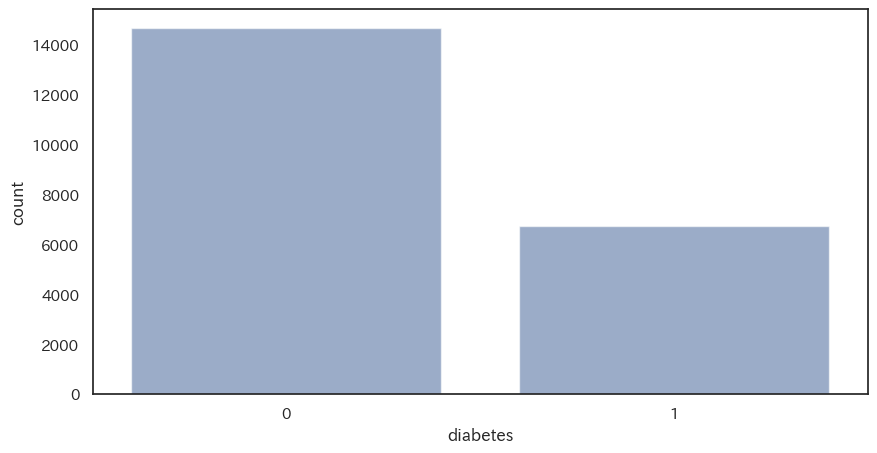

In [11]:
#糖尿病患者数と割合の算出
print("数:", df["diabetes"].sum())#数
print("割合:", df["diabetes"].mean())
sns.countplot(x="diabetes",data=df,alpha=0.6)


## 課題2. 糖尿病である人はどのような傾向があるか？

各変数と糖尿病との関係性を確認する  
↓  
ageのような連続変数の場合：糖尿病と非糖尿病でヒストグラムとdescribeを作成し、分布や統計値(平均など)の差を比較  
genderのような2値変数orカテゴリー変数の場合：カテゴリー別に棒グラフと糖尿病率を作成し、糖尿病率の差を比較

,diabetes
gender,
Female,0.289321
Male,0.348913


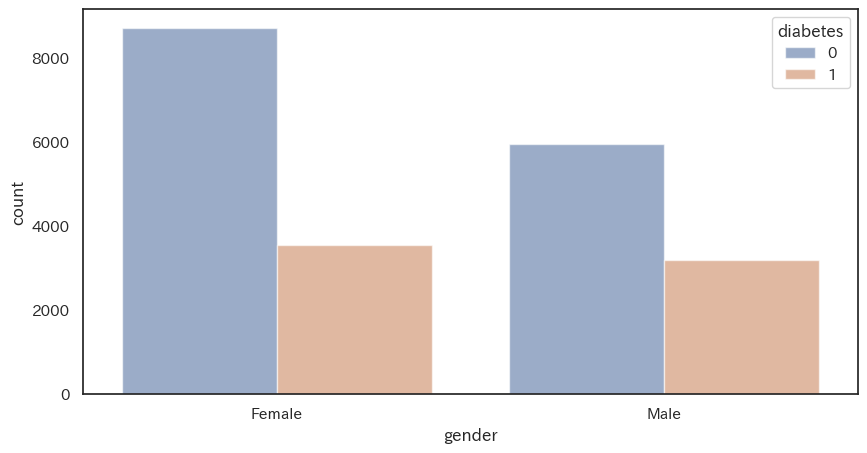

In [12]:
#gender
target = "gender"
sns.countplot(x=target,data=df,hue="diabetes",alpha=0.6)
df[["diabetes",target]].groupby(target).mean()

diabetes      age                                                    
              count       mean        std   min   25%   50%   75%   max
0        0  14693.0  40.326928  22.378458  0.08  22.0  40.0  57.0  80.0
1        1   6747.0  60.962205  14.516536  3.00  52.0  62.0  72.0  80.0

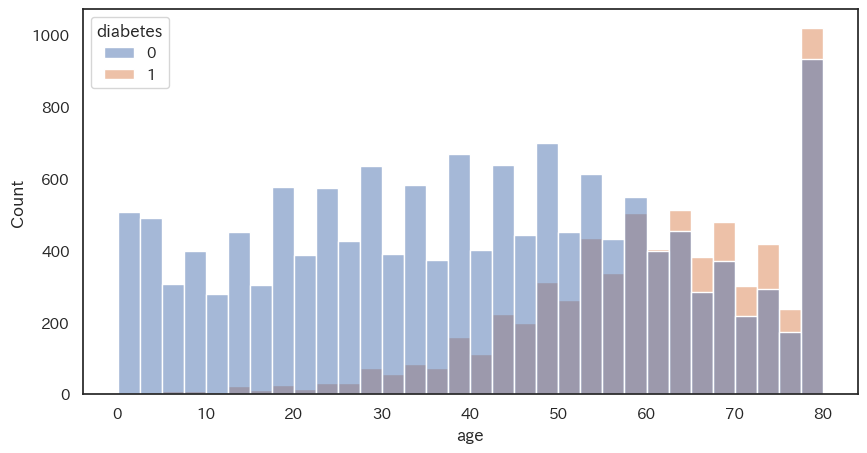

In [14]:
#age
df.query('age <= 3')

target = "age"
sns.histplot(x=target,hue="diabetes",data=df)
df.groupby("diabetes",as_index=False).describe()[["diabetes",target]]

,diabetes
hypertension,
0,0.270333
1,0.657573


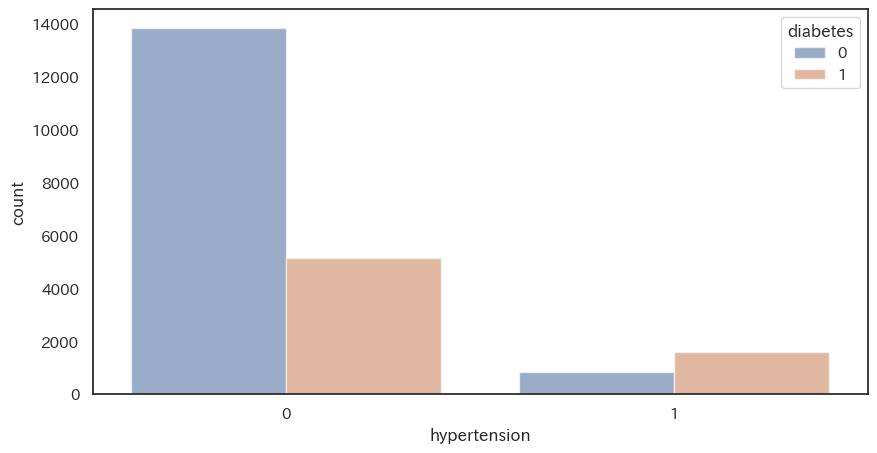

In [17]:
#hypertension(高血圧)
target = "hypertension"
sns.countplot(x=target,data=df,hue="diabetes",alpha=0.6)
df[["diabetes",target]].groupby(target).mean()

,diabetes
heart_disease,
0,0.287138
1,0.689843


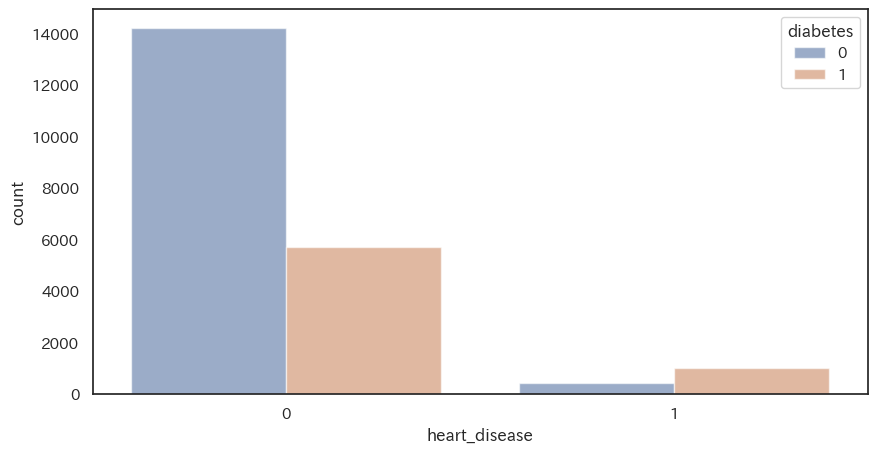

In [19]:
#heart_disease
target = "heart_disease"
sns.countplot(x=target,data=df,hue="diabetes",alpha=0.6)
df[["diabetes",target]].groupby(target).mean()

,diabetes
smoking_history,
NULL,0.173270
current,0.358742
ever,0.378186
former,0.509434
never,0.344075
not current,0.368598


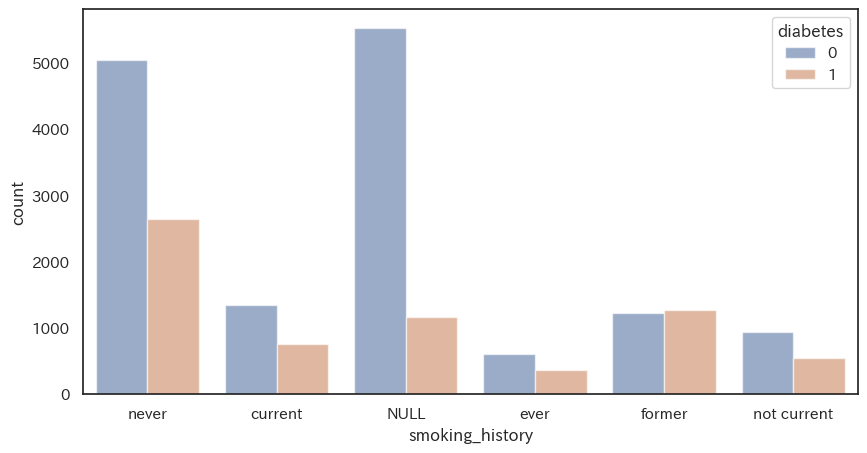

In [31]:


#smoking_history
df["smoking_history"] = df["smoking_history"].fillna("NULL")
target = "smoking_history"
sns.countplot(x=target, data=df, hue="diabetes", alpha=0.6)
df[["diabetes", target]].groupby(target).mean()

# 欠損だけ糖尿病率が低いため、何らかの意味がある欠損である可能性が高い
# neverの糖尿病率があまり低くないのは意外 → 喫煙と糖尿病は意外とそこまで関係ない？？
# 現喫煙者よりも元喫煙者の方が糖尿病率が高い → 糖尿病診断を受けて喫煙をやめた人がいる or 元喫煙者には高齢な人が多い、などの仮説が立てられそう

In [35]:
#bmi
print(df.query('bmi != 0')['bmi'].min())
print(df.query('bmi == 0')['age'].mean())
df.query('bmi == 0')
df.sort_values("bmi",ascending=False).head(10)

10.86
48.72529411764705


,index,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
8588,96066,Male,80.0,0,0,never,88.76,6.2,140,0
10668,4551,Female,45.0,0,0,never,88.72,7.0,300,1
8659,90043,Female,34.0,0,0,NULL,87.70,6.0,126,0
12209,22454,Male,19.0,0,0,NULL,87.51,3.5,85,0
7384,24186,Male,49.0,0,0,former,83.74,6.8,155,1
18208,58318,Female,36.0,0,0,never,79.46,6.2,220,1
18479,20355,Female,55.0,0,0,former,73.77,6.6,160,0
9710,28645,Female,42.0,0,0,never,72.89,6.8,280,1
11893,82244,Female,52.0,0,0,never,72.21,6.6,220,1
12735,63048,Female,39.0,0,0,never,70.96,6.6,85,0


diabetes      bmi                                                        
              count       mean       std    min    25%    50%    75%    max
0        0  14641.0  26.859171  6.482021  10.86  23.13  27.32  28.88  88.76
1        1   6731.0  32.016351  7.593397  11.91  27.32  29.97  35.94  88.72

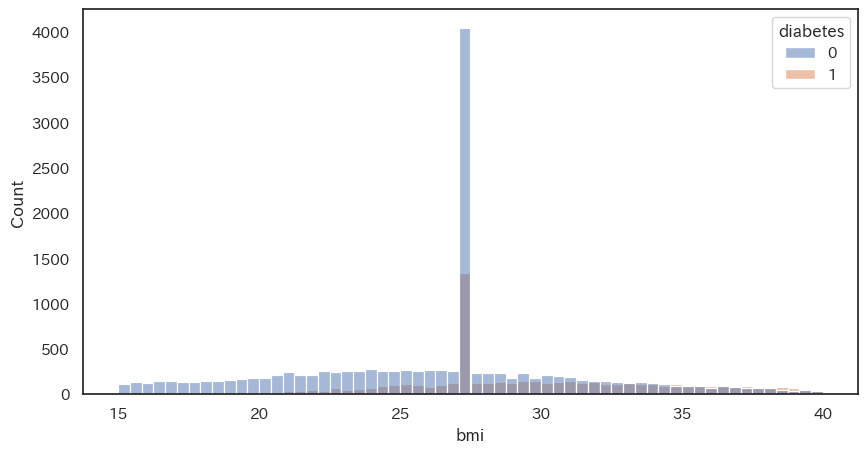

In [38]:
#bmi

df_except_bmi0 = df.query('bmi != 0')
df_graph = df.query('bmi>15 and bmi<40')
target="bmi"
sns.histplot(x=target,hue="diabetes",data=df_graph)
df_except_bmi0.groupby("diabetes",as_index=False).describe()[["diabetes",target]]


diabetes HbA1c_level                                             
                 count      mean       std  min  25%  50%  75%  max
0        0     14693.0  5.381331  0.973296  3.5  4.5  5.7  6.1  6.6
1        1      6747.0  6.930325  1.072820  5.7  6.1  6.6  7.5  9.0

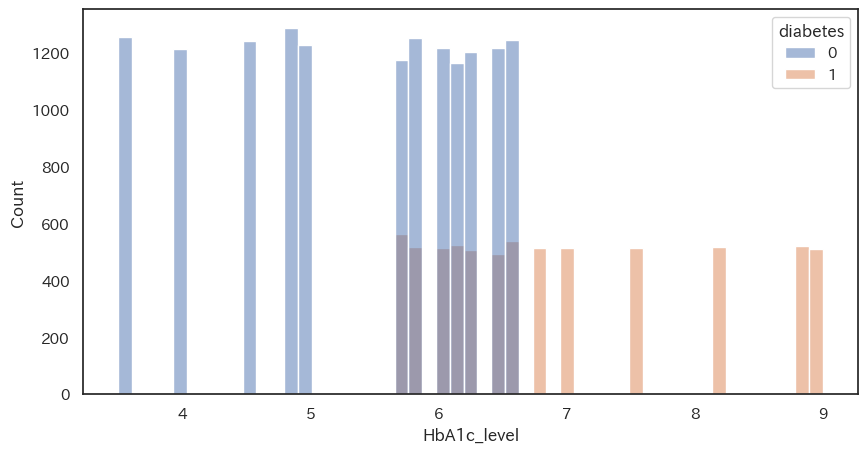

In [39]:
#HbA1c_level
target="HbA1c_level"
sns.histplot(x=target,hue="diabetes",data=df)
df.groupby("diabetes",as_index=False).describe()[["diabetes",target]]

diabetes blood_glucose_level                                              \
                         count        mean        std    min    25%    50%   
0        0             14693.0  132.831757  34.069874   80.0  100.0  140.0   
1        1              6747.0  194.202460  58.829767  126.0  145.0  160.0   

                 
     75%    max  
0  158.0  200.0  
1  240.0  300.0

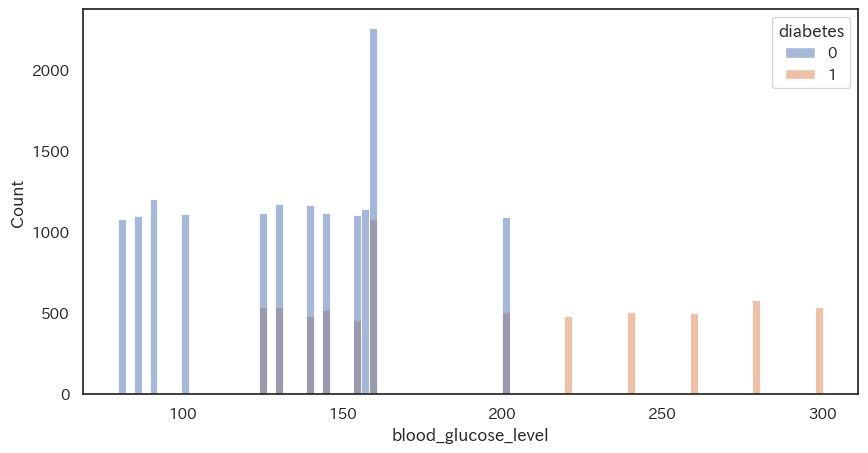

In [40]:
#blood_glucose_level
target = "blood_glucose_level"
sns.histplot(x=target,hue="diabetes",data=df)
df.groupby("diabetes",as_index=False).describe()[["diabetes",target]]

## 課題3. 糖尿病を予防するにはどのようなアクションが有効そうか？

## 分析の結論

##### ・定期的な健康診断や運動指導、栄養しどうの機会を増やす
##### ・糖尿病を合併するリスクを医師や本人に周知し糖尿病にも気をつける
##### ・bmiを22になるように指導し、bmiが35以上の人は特に食事、栄養指導などのサポートを行う